/var/folders/y9/73d8vs756fl7t9s57p1zlxvh0000gp/T/ipykernel_19380/617066574.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  np.cot = lambda x: 1 / np.tan(x)


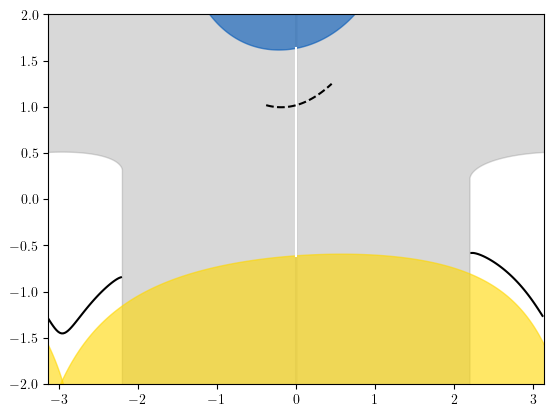

In [2]:
import numpy as np
import cmath
import math
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CM"],
    "mathtext.fontset": "cm"  # 使用CM Math作为数学模式字体
})

ksi = 0.7
psi = math.pi*0.35

np.cot = lambda x: 1 / np.tan(x)

def Energy(k):
    energy = 2 / (2 * (1 + ksi)) * (np.cot((psi - k) / 2) + ksi * np.cot((psi + k) / 2))
    return energy

def Energy2(q):
    return (Energy(q)+Energy(K-q))/2

def Energy3(q):
    return -Energy2(q)

# def Energy4(q):
#     if Energy2(q) < 0:
#         return -Energy2(q)
#     else:
#         return 100

K1 = np.linspace(-2*psi,2*psi,1000)
Emin1 = []

for i in range(len(K1)):
    K = K1[i]
    lower_bound = max(-psi, K - psi)
    upper_bound = min(psi, K + psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin1.append(result.fun)

K7 = np.linspace(2*psi,2*(2*math.pi-psi),1000)
Emax7 = []


for i in range(len(K7)-1):
    K = K7[i]
    # print(i)
    lower_bound = max(psi,K+psi-2*math.pi)
    upper_bound = min(2*math.pi-psi, K-psi)
    # lower_bound = psi
    # upper_bound = K-psi
    result = minimize_scalar(Energy3, bounds=(lower_bound,upper_bound), method='bounded')
    Emax7.append(-result.fun)
    # print(result.x)

k7 = K7[:999]-2*math.pi

K8 = np.linspace(0,2*math.pi,1000)
Emin8 = []

for i in range(len(K8)):
    K = K8[i]
    lower_bound = max(-psi,K+psi-2*math.pi)
    upper_bound = min(psi, K-psi)
    result = minimize_scalar(Energy2, bounds=(lower_bound,upper_bound), method='bounded')
    Emin8.append(result.fun)

x_chiral = np.load('x_chiral.npy')
y_chiral = np.load('y_chiral.npy')

xr = []
yr = []
xl = []
yl = []

for i in range(len(x_chiral)):
    if x_chiral[i] < math.pi:
        xr.append(x_chiral[i])
        yr.append(y_chiral[i])
    else:
        xl.append(x_chiral[i]-2*math.pi)
        yl.append(y_chiral[i])

def curve(x):
    return 0.62*(x+0.19)*(x+0.19) + 0.995

xbound0 = np.linspace(-0.38,0.45,100)
ybound0 = []
for i in range(len(xbound0)):
    ybound0.append(curve(xbound0[i]))

plt.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
plt.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

plt.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
plt.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

plt.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


plt.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white')

plt.plot(xbound0,ybound0,linestyle='--',c='black')

plt.plot(xr,yr,c='black')
plt.plot(xl,yl, c= 'black')

plt.ylim(-2,2)
plt.xlim(-math.pi,math.pi)
# plt.savefig('Scattering_spectrum3.png')
plt.show()


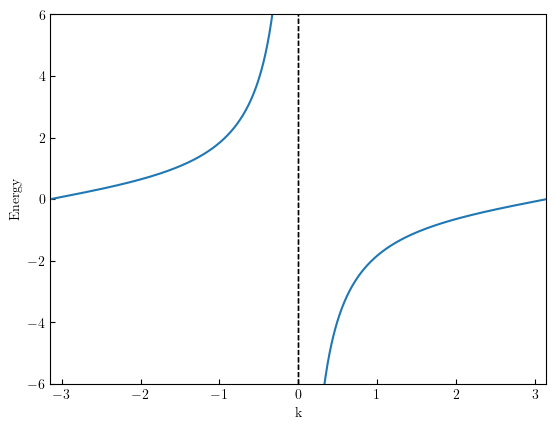

In [35]:
def handle_discontinuity(k, y, threshold):
    y_new = y.copy()
    for i in range(1, len(y)):
        if abs(y[i] - y[i - 1]) > threshold:
            y_new[i] = np.nan  # 插入 np.nan
    return y_new


k = np.linspace(-math.pi,math.pi,1000)

ksi = 0
psi = 0

E = Energy(k)
E_clean = handle_discontinuity(k, E, threshold=3)


plt.plot(k,E_clean)
# plt.plot(k,E1_clean)
plt.ylim(-6, 6)
plt.xlim(-math.pi,math.pi)
plt.axvline(-psi, color="black", linestyle="--", linewidth=1)
plt.axvline(psi, color="black", linestyle="--", linewidth=1)
# plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.xlabel("k")
plt.ylabel("Energy")
plt.tick_params(direction='in')

plt.show()


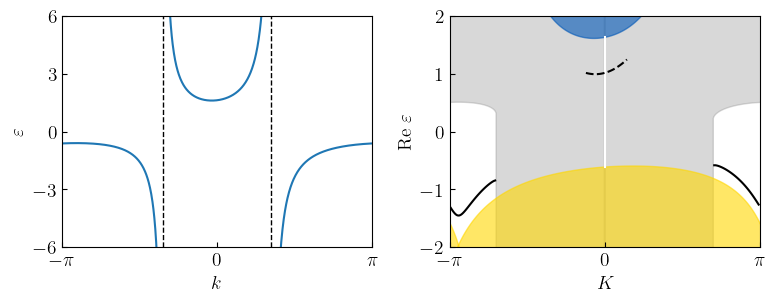

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

ax1.plot(k,E_clean)
# plt.plot(k,E1_clean)
ax1.set_ylim(-6, 6)
ax1.set_xlim(-math.pi,math.pi)
ax1.axvline(-psi, color="black", linestyle="--", linewidth=1)
ax1.axvline(psi, color="black", linestyle="--", linewidth=1)
# plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
ax1.set_xlabel(r"$k$",fontsize=14)
ax1.set_ylabel(r"$\varepsilon$",fontsize=14)

ax1.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax1.set_yticks([-6,-3,0,3,6],[r'$-6$',r'$-3$',r'$0$',r'$3$',r'$6$'],fontsize=14)
ax1.tick_params(direction='in')

ax2.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
ax2.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

ax2.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
ax2.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

ax2.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


ax2.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white')

ax2.plot(xbound0,ybound0,linestyle='--',c='black')

ax2.plot(xr,yr,c='black')
ax2.plot(xl,yl, c= 'black')

ax2.set_ylim(-2,2)
ax2.set_xlim(-math.pi,math.pi)

ax2.set_xticks([-math.pi,0,math.pi],[r'$-\pi$',r'$0$',r'$\pi$'], fontsize=14)
ax2.set_yticks([-2,-1,0,1,2],[r'$-2$',r'$-1$',r'$0$',r'$1$',r'$2$'],fontsize=14)
ax2.tick_params(direction='in')

ax2.set_xlabel(r'$K$', fontsize=14)
ax2.set_ylabel(r'$\mathrm{Re}\ \varepsilon$', fontsize=14)

plt.subplots_adjust(wspace=0.25)
plt.savefig('figure2_inset.pdf',format='pdf')
plt.show()

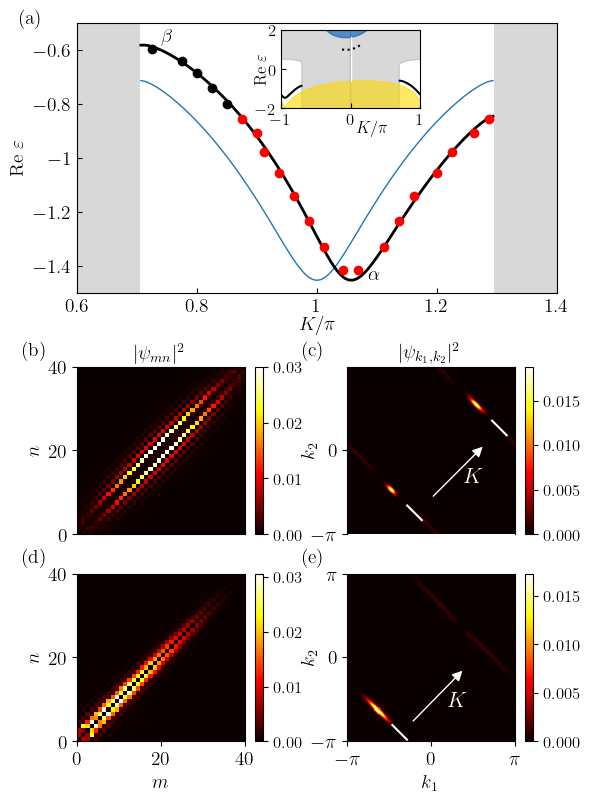

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch


x_non = np.load('x_non.npy')
y_non = np.load('y_non.npy')
x_chiral = np.load('x_chiral.npy')
y_chiral = np.load('y_chiral.npy')
x1 = np.load('x1.npy')
y1 = np.load('y1.npy')
x2 = np.load('x2.npy')
y2 = np.load('y2.npy')
F1_414 = np.load('F1_414.npy')
F3_414 = np.load('F3_414.npy')
F1_665 = np.load('F1_665.npy')
F3_665 = np.load('F3_665.npy')
pi = math.pi

N = 40
M = 2*N

# fig = plt.figure(figsize=(6.5, 9))
#
# grid = plt.GridSpec(3, 2, wspace=0.5, hspace=0.4, height_ratios=[1.4,1,1])
# ax1 = plt.subplot(grid[0, 0:2])
# ax2 = plt.subplot(grid[1,0])
# ax21 = plt.subplot(grid[1,1])
# ax3 = plt.subplot(grid[2,0])
# ax31 = plt.subplot(grid[2,1])

fig = plt.figure(figsize=(6, 9))

# 手动设置每个子图的位置
ax1 = fig.add_axes([0.05, 0.65, 0.8, 0.3])  # ax1: 第一行
ax2 = fig.add_axes([0.05, 0.35, 0.31, 0.25])  # ax2: 第二行左
ax21 = fig.add_axes([0.5, 0.35, 0.31, 0.25])  # ax21: 第二行右
ax3 = fig.add_axes([0.05, 0.12, 0.31, 0.25])  # ax3: 第三行左
ax31 = fig.add_axes([0.5, 0.12, 0.31, 0.25])  # ax31: 第三行右


ax1.text(-0.12, 1.05, '(a)', transform=ax1.transAxes, fontsize=14, va='top')
ax2.text(-0.33, 1.15, '(b)', transform=ax2.transAxes, fontsize=14, va='top')
ax21.text(-0.27, 1.15, '(c)', transform=ax21.transAxes, fontsize=14, va='top')
ax3.text(-0.33, 1.15, '(d)', transform=ax3.transAxes, fontsize=14, va='top')
ax31.text(-0.27, 1.15, '(e)', transform=ax31.transAxes, fontsize=14, va='top')
ax21.text(0.7, 0.4, r'$K$', transform=ax21.transAxes, c='white', fontsize=16, va='top')
ax31.text(0.6, 0.3, r'$K$', transform=ax31.transAxes, c='white', fontsize=16, va='top')


plt.sca(ax1)
rectangle1 = patches.Rectangle((0.6*pi, -1.5), 0.105*pi, 1, linewidth=0, edgecolor='none', facecolor='grey', alpha=0.3)
plt.gca().add_patch(rectangle1)

rectangle2 = patches.Rectangle((1.295*pi, -1.5), 0.105*pi, 1, linewidth=0, edgecolor='none', facecolor='grey', alpha=0.3)
plt.gca().add_patch(rectangle2)

ax1.plot(x_non,y_non, linewidth = 1)
ax1.plot(x_chiral,y_chiral,c='black', linewidth=2)
ax1.scatter(x1,y1, c='r', zorder=2)
ax1.scatter(x2,y2,c='black', zorder = 2)
ax1.set_ylim(-1.5,-0.5)
ax1.set_xlim(0.6*pi,1.4*pi)
ax1.set_xticks([0.6*math.pi,0.8*math.pi,pi,1.2*math.pi,1.4*math.pi],[r'$0.6$',r'$0.8$',r'$1$',r'$1.2$',r'$1.4$'], fontsize = 14)
ax1.set_yticks([-1.4,-1.2,-1,-0.8,-0.6],[r'$-1.4$',r'$-1.2$',r'$-1$',r'$-0.8$',r'$-0.6$'],fontsize=14)
ax1.set_xlabel(r'$K/\pi$',labelpad=-0, x=0.5,fontsize = 14)
# ax1.set_xlabel(r'$K/\pi$',labelpad=-3,fontsize = 14)
ax1.set_ylabel(r'$\mathrm{Re}\ \varepsilon$',fontsize = 14)
ax1.tick_params(direction='in')

ax1.text(1.085*pi,-1.45,r'$\alpha$', fontsize =14)
ax1.text(0.74*pi,-0.57,r'$\beta$', fontsize =14)

cax2 = ax2.imshow(F1_414, cmap='hot', interpolation='nearest', origin = 'lower')
ax2.set_title(r'$|\psi_{mn}|^2$',fontsize = 14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar2 = fig.colorbar(cax2, cax=cax)
cbar2.ax.tick_params(labelsize=12)
cbar2.set_ticks([0,0.01,0.02,0.03])

# ax2.set_xticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
ax2.set_yticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
# ax2.set_xlabel(r'$m$',fontsize = 14)
# ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_xlabel('')
ax2.set_ylabel(r'$n$',fontsize = 14)

cax21 = ax21.imshow(np.abs(F3_414)**2/25600, cmap='hot', interpolation='nearest', origin = 'lower')
ax21.set_title(r'$|\psi_{k_1,k_2}|^2$',fontsize = 14)
divider = make_axes_locatable(ax21)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar21 = fig.colorbar(cax21, cax=cax)
cbar21.ax.tick_params(labelsize=12)
cbar21.set_ticks([0,0.005,0.01,0.015])

# ax21.set_xticks([0,M,2*M],[r'$-\pi$',r'$0$',r'$\pi$'],fontsize = 14)
ax21.set_yticks([0,M,2*M],[r'$-\pi$',r'$0$',r'$\pi$'],fontsize = 14)
# ax21.set_xlabel(r'$k_1$',fontsize = 14)
ax21.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax21.spines['bottom'].set_visible(False)
ax21.set_ylabel(r'$k_2$',labelpad=-5, y=0.5,fontsize = 14)

pointx1 = np.arange(138,153)
pointy1 = 123*2 - pointx1

pointx2 = np.arange(57,57+15)
pointy2 = 42*2 - pointx2

arrowx = np.arange(65+20,146-20)
arrowy = arrowx - 46

ax21.plot(pointx1,pointy1,c='white')
ax21.plot(pointx2,pointy2,c='white')

arrow1 = FancyArrowPatch((65+15, 19+15), (146-15, 100-15), color='white', arrowstyle='-|>', mutation_scale=15)
ax21.add_patch(arrow1)



cax3 = ax3.imshow(F1_665, cmap='hot', interpolation='nearest', origin = 'lower')
# ax3.set_title(r'$|\psi_{mn}|^2$', fontsize =14)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar3 = fig.colorbar(cax3, cax=cax)
cbar3.ax.tick_params(labelsize=12)
cbar3.set_ticks([0,0.01,0.02,0.03])

ax3.set_xticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
ax3.set_yticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
ax3.set_xlabel(r'$m$',fontsize = 14)
ax3.set_ylabel(r'$n$',fontsize = 14)

cax31 = ax31.imshow(np.abs(F3_665)**2/25600, cmap='hot', interpolation='nearest', origin = 'lower')
# ax31.set_title(r'$|\psi_{k_1,k_2}|^2$',fontsize = 14)
divider = make_axes_locatable(ax31)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar31 = fig.colorbar(cax31, cax=cax)
cbar31.ax.tick_params(labelsize=12)
cbar31.set_ticks([0,0.005,0.01,0.015])

pointx = np.arange(43,58)
pointy = 29*2-pointx
ax31.plot(pointx,pointy, c='white')

arrow2 = FancyArrowPatch((51+10, 7+10), (132-20, 89-20), color='white', arrowstyle='-|>', mutation_scale=15)
ax31.add_patch(arrow2)


ax31.set_xticks([0,M,2*M],[r'$-\pi$',r'$0$',r'$\pi$'],fontsize = 14)
ax31.set_yticks([0,M,2*M],[r'$-\pi$',r'$0$',r'$\pi$'],fontsize = 14)
ax31.set_xlabel(r'$k_1$',fontsize = 14)
ax31.set_ylabel(r'$k_2$',labelpad=-5, y=0.5,fontsize = 14)

inset1 = fig.add_axes([0.39, 0.855, 0.08*2.9, 0.03*2.9])
inset1.fill_between(K8,3,Emin8, color='grey', alpha=0.3)
inset1.fill_between(K8-2*math.pi,3,Emin8, color='grey', alpha=0.3)

inset1.fill_between(k7,Emax7,-3, color='#FFD700', alpha=0.6)
inset1.fill_between(k7-2*math.pi,Emax7,-3, color='#FFD700', alpha=0.6)

inset1.fill_between(K1,3,Emin1, color='#0057B7', alpha=0.6)


inset1.plot([0,0], [-0.612801,1.63185], linestyle='-', color='white', linewidth=1)

inset1.plot(xbound0,ybound0,linestyle=':',c='black')

inset1.plot(xr,yr,c='black')
inset1.plot(xl,yl, c= 'black')

inset1.set_ylim(-2,2)
inset1.set_xlim(-math.pi,math.pi)

inset1.set_xticks([-math.pi,0,math.pi],[r'$-1$',r'$0$',r'$1$'], fontsize=12)
inset1.set_yticks([-2,0,2],[r'$-2$',r'$0$',r'$2$'],fontsize=12)
inset1.tick_params(direction='in')

# inset1.set_xlabel(r'$K/\pi$', fontsize=12,labelpad=-6,x=0.6)
inset1.set_xlabel(r'$K/\pi$', fontsize=12,labelpad=-6,x=0.65)
inset1.set_ylabel(r'$\mathrm{Re}\ \varepsilon$', fontsize=12,labelpad=-10,y=0.5)


# plt.savefig('Bound_plt7.pdf', format='pdf',bbox_inches='tight')
plt.savefig('Fig2_new2.pdf', format='pdf',bbox_inches='tight')
plt.show()


In [13]:
print(np.array_equal(F3_665_1,F3_665))

True
